In [4]:
import pickle
import numpy as np
import pandas as pd
data=data=pd.read_csv("new_data_office.csv")


In [7]:
tf=pickle.load(open("tfvectorizer.sav","rb"))

In [5]:
data

,Unnamed: 0,date,chat,time,messager
0,1,9/17/23,🙏🙏🙏,2:20 PM,+91 96000 29515
1,2,9/17/23,Many more happy returns of the day Anil 💐💐💐,2:20 PM,+91 96000 29515
2,3,9/17/23,Happy Birthday Anil 🥳🎉🥰,2:21 PM,+91 63697 77039
3,4,9/17/23,Thank you sir,2:23 PM,+91 90429 04253
4,5,9/17/23,Many more happy returns of the day Anil 💐💐💐💐🎂🎂🎂🎂,2:23 PM,Kumar IT Vcare
...,...,...,...,...,...
5983,6842,2/6/25,Belated Happy Birthday @917397778410,2:21 PM,Vinoth Sankar
5984,6845,2/6/25,Belated Happy Birthday @⁨Dhanasekar⁩,5:18 PM,Raja Vcare
5985,6846,2/6/25,Thousands of thanks to all.🙏😍,5:59 PM,+91 95662 86282
5986,6847,2/6/25,Thank you sir,6:58 PM,Dhanasekar Vcare


# 1 applying flirt detection model on the watsapp chat

In [8]:
chat_matrix=tf.transform(data["chat"])

In [9]:
model=pickle.load(open("model_dt.sav","rb"))

In [10]:
model.predict(chat_matrix)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# 2 who r the most active members?

In [24]:
msg_count=data["chat"].value_counts()

In [26]:
msg_count.index

Index([' <Media omitted>', ' Thank you sir', ' This message was deleted',
       ' Noted mam', ' Thank you mam', ' Noted sir', ' Thank you', ' Sure sir',
       ' 👏👏👏', ' Dear All',
       ...
       ' Thanq sir', ' Thank you sir ☺️', ' Happy women's day',
       ' https://youtu.be/7D4Fst0zuYg',
       ' *மங்கையாய் பிறப்பதற்கே நல்ல மாதவம் செய்திடல் வேண்டுமம்மா!*',
       ' @919789964637 Many More Happy Returns of the day Jagan 🎂🎂🎂🎂💐💐💐💐',
       ' Many happy returns of the day @919789964637', ' Happy birthday Jagan',
       ' Happiest b'day Jagan💐🎂', ' Thousands of thanks to all.🙏😍'],
      dtype='object', length=3998)

In [28]:
messager_count=data["messager"].value_counts()

In [35]:
messager_count

 Mukundan_CEO Vcare      275
 Preethi Clinic Vcare    228
 Kumar IT Vcare          205
 Vinoth Sankar           171
 Wasim Vcare Imports     154
                        ... 
 +91 93603 10822           1
 +91 73393 35564           1
 +91 90032 92429           1
 +91 89258 03279           1
 +91 80156 90056           1
Name: messager, Length: 175, dtype: int64

In [32]:
no_of_messages_per_person=messager_count.values

In [33]:
max(no_of_messages_per_person)

275

In [39]:
# to find the identity and the max no of messages sent by a person i use idxmax()
messager_count.idxmax()

' Mukundan_CEO Vcare'

# 2 top 5 most talkative

In [45]:
top_five=messager_count.head(5)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'top 5 messagers')

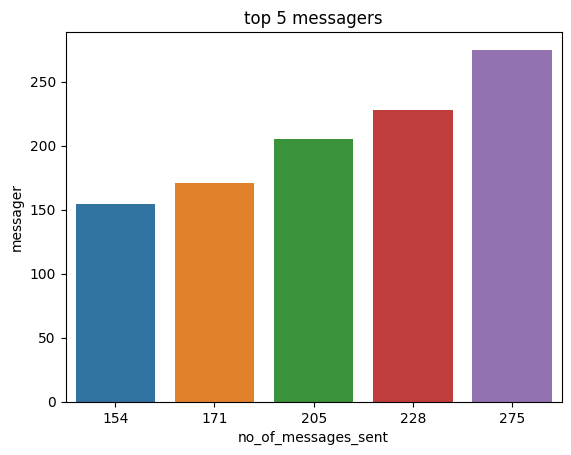

In [49]:
sns.barplot(top_five,x=top_five.values,y=top_five.index)
plt.xlabel("no_of_messages_sent")
plt.ylabel("messager")
plt.title("top 5 messagers")

# 3 . What are the busiest days?


In [58]:
data["date"].value_counts().sort_index()

1/1/24     68
1/1/25     19
1/10/24    60
1/10/25    67
1/11/25     4
           ..
9/29/24     1
9/3/24     36
9/5/24     16
9/6/24      4
9/7/24     12
Name: date, Length: 249, dtype: int64

In [59]:
messages_perday=data["date"].value_counts().sort_values()# it gives the no of messages on each date but sorted in ascending order
#messages_perday

In [62]:
top_5_dates=messages_perday.tail(5)

Text(0, 0.5, 'message_count')

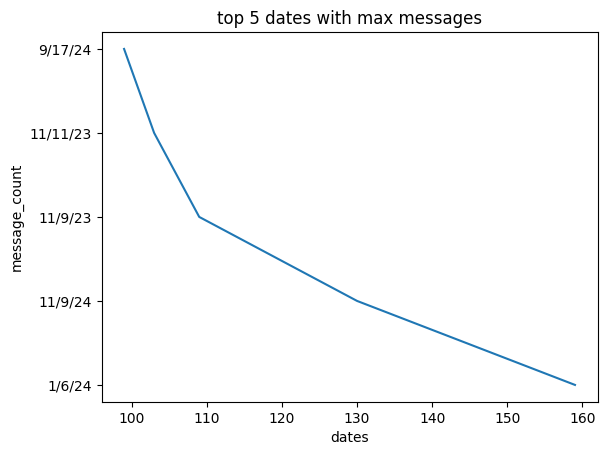

In [66]:
sns.lineplot(top_5_dates,x=top_5_dates.values,y=top_5_dates.index)
plt.title("top 5 dates with max messages")
plt.xlabel("dates")
plt.ylabel("message_count")

# 4. How many messages are media vs text?

In [68]:
data["chat"].value_counts()

 <Media omitted>                                                    538
 Thank you sir                                                      110
 This message was deleted                                            99
 Noted mam                                                           63
 Thank you mam                                                       47
                                                                   ... 
 @919789964637 Many More Happy Returns of the day Jagan 🎂🎂🎂🎂💐💐💐💐      1
 Many happy returns of the day @919789964637                          1
 Happy birthday Jagan                                                 1
 Happiest b'day Jagan💐🎂                                               1
 Thousands of thanks to all.🙏😍                                        1
Name: chat, Length: 3998, dtype: int64

In [77]:
data["message_type"]=data["chat"].apply(lambda x:"media" if 'omitted' in str(x).lower() else "text")

In [79]:
messages_types=data["message_type"].value_counts()

Text(0.5, 1.0, 'text vs media count')

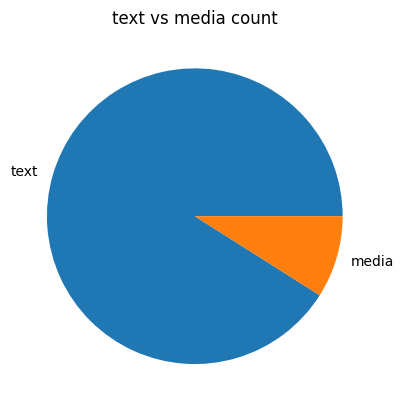

In [83]:
plt.pie(messages_types.values,labels=messages_types.index)
plt.title("text vs media count")

# 5 commonly used emojis

In [101]:
data

,Unnamed: 0,date,chat,time,messager,message_type
0,1,9/17/23,🙏🙏🙏,2:20 PM,+91 96000 29515,text
1,2,9/17/23,Many more happy returns of the day Anil 💐💐💐,2:20 PM,+91 96000 29515,text
2,3,9/17/23,Happy Birthday Anil 🥳🎉🥰,2:21 PM,+91 63697 77039,text
3,4,9/17/23,Thank you sir,2:23 PM,+91 90429 04253,text
4,5,9/17/23,Many more happy returns of the day Anil 💐💐💐💐🎂🎂🎂🎂,2:23 PM,Kumar IT Vcare,text
...,...,...,...,...,...,...
5983,6842,2/6/25,Belated Happy Birthday @917397778410,2:21 PM,Vinoth Sankar,text
5984,6845,2/6/25,Belated Happy Birthday @⁨Dhanasekar⁩,5:18 PM,Raja Vcare,text
5985,6846,2/6/25,Thousands of thanks to all.🙏😍,5:59 PM,+91 95662 86282,text
5986,6847,2/6/25,Thank you sir,6:58 PM,Dhanasekar Vcare,text


In [102]:
text_messages=data[data["message_type"]=="text"]["chat"]

In [103]:
text_messages

0                                                     🙏🙏🙏
1             Many more happy returns of the day Anil 💐💐💐
2                                 Happy Birthday Anil 🥳🎉🥰
3                                           Thank you sir
4        Many more happy returns of the day Anil 💐💐💐💐🎂🎂🎂🎂
                              ...                        
5982     TN 09 CC 2749. Left the key on the bike itsel...
5983                 Belated Happy Birthday @917397778410
5984                 Belated Happy Birthday @⁨Dhanasekar⁩
5985                        Thousands of thanks to all.🙏😍
5986                                        Thank you sir
Name: chat, Length: 5450, dtype: object

In [95]:
import re
from collections import Counter

In [96]:
emoji_pattern = re.compile("[\U0001F600-\U0001F64F"  # emoticons
                           "\U0001F300-\U0001F5FF"  # symbols & pictographs
                           "\U0001F680-\U0001F6FF"  # transport & map symbols
                           "\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [97]:
emojis_list = []


In [107]:
for message in text_messages:
    emojis_in_msg=re.findall(emoji_pattern,message)
    emojis_list.extend(emojis_in_msg)

In [114]:
emojis_list

['🙏🙏🙏',
 '💐💐💐',
 '🎉',
 '💐💐💐💐🎂🎂🎂🎂',
 '🎂',
 '🎉🎉🎉🎊🎊🎊🎊',
 '💐',
 '🎉🎊',
 '🎂',
 '🎉',
 '🎂',
 '💐🎂💐',
 '🎂',
 '💐💐💐💐🎂🎂🎂🎂🍫🍫🍫',
 '💐💐💐💐💐💐💐💐🎂',
 '💐',
 '🎂🎂🎂',
 '💐💐💐',
 '💐💐🎂🎂',
 '🎂',
 '💐🎂',
 '💐🎂',
 '🎂🎂',
 '💐💐💐',
 '🎂🎂💐',
 '💐💐💐💐💐💐💐💐💐',
 '🎈🎊',
 '💐🎂💐',
 '🎊🎈',
 '🎂🎂🎂',
 '🎂🎂🎂',
 '🎉',
 '🎉',
 '🎂🎂🎂🎂',
 '🎂💐',
 '🎂🎂💐💐',
 '🙏',
 '💐💐💐',
 '💐💐💐💐',
 '😇',
 '🙏',
 '🎂🎂🎂🎂',
 '🙏',
 '🙏',
 '🎂🎂🎂💐💐💐',
 '🎂🎂🎂',
 '💐💐',
 '🙏',
 '🙏',
 '🙏',
 '💐💐',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '🎂🎂🎉🎉',
 '🙏',
 '🎂🎂💐💐',
 '🙏',
 '💐🎂',
 '🙏',
 '🙏',
 '🎂🎂🎂🎂💐💐💐💐',
 '🙏',
 '💐💐💐',
 '🎂🎂🎂',
 '💐💐💐',
 '🎈💐🎂🎂🎂💐🎈',
 '💐🎊💐🎊💐',
 '🙏',
 '🙏',
 '🙏',
 '😊😊',
 '🙏',
 '🙏',
 '🙏',
 '🙏',
 '💐💐💐',
 '🙏',
 '💐💐💐💐',
 '👍🏼',
 '📝',
 '🙏',
 '💥🎉',
 '🙌🙌',
 '👍🏽👍🏽',
 '👍🏻👍🏻',
 '👍👍',
 '👏👏👏👏',
 '🔥🔥🔥',
 '👏🏻👏🏻👏🏻',
 '👍👍👌👌',
 '👏🏻👏🏻👏🏻👏🏻',
 '🔥👏🏻',
 '👏👏👏',
 '🏻',
 '💐💐',
 '😇😇',
 '💐💐💐',
 '💐',
 '💐💐',
 '🎉🎉',
 '💐💐💐',
 '💐💐💐🎉',
 '💐💐💐',
 '💐💐💐',
 '🎉🎉🎉',
 '🎉',
 '💐💐💐',
 '💐',
 '😊',
 '🎉😊🎊',
 '🎊🎉',
 '🎉🎉🎉🎉🎂🎂🎂',
 '😊🎊',
 '💐💐💐',
 '😎🎂💐💐💐',
 '💫🎂',
 '💐🎂',
 '💐💐💐',
 '💐💐💐',
 '😊',
 '😊',
 '💫🎂',
 '🎂',
 '💐💐',
 '😊',
 '💐💐💐💐🎂🎂🎂🎂',
 '💐💐💐',
 '💐💐💐',
 '🎂'

In [110]:
emoji_count=Counter(emojis_list)

In [127]:
top_used_emojis=emoji_count.most_common(5)
top_used_emojis

[('💐💐💐', 329), ('😊', 235), ('🎂🎂🎂', 184), ('💐', 172), ('🎂', 158)]

Text(0.5, 1.0, 'Top 5 Most Used Emojis')

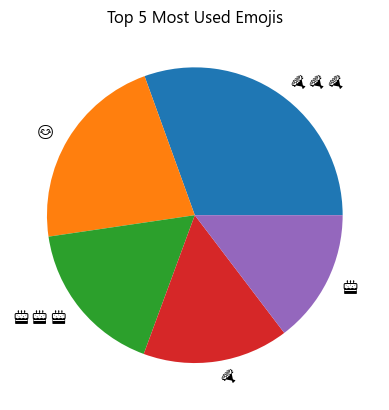

In [126]:
plt.rcParams['font.family'] = 'Segoe UI Emoji'  # for Windows to see the emojis around the pie chart 

emojis, counts = zip(*top_used_emojis)# top_used_emojis is a list of tuples ('💐💐💐', 329) which cant be plotted on a chart so cos its a list with emojisand 
# their counts so it should be seperated to 2 variables then we can plot
plt.pie(counts,labels=emojis)
plt.title("Top 5 Most Used Emojis")